<a href="https://colab.research.google.com/github/Chromatina/su-mt4007/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Task 1

In [3]:
df = pd.read_csv("covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


# Task 2

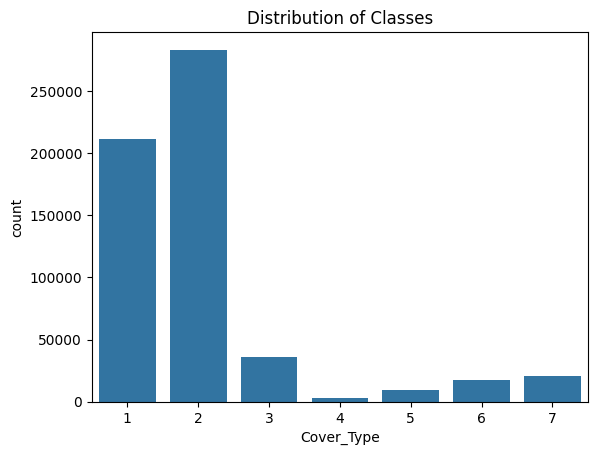

In [4]:
sns.countplot(x="Cover_Type", data=df)
plt.title("Distribution of Classes")
plt.show()

From the plot above we see that class 1 and 2 represent the majority of the data, in this case class imbalance is an issue since the network could simply ignore the other classes and only make predictions on the first two. Since the first two classes represent about 85% of the data (see print-out below), the model would be correct 85% of the time (if it correctly classifies these two classes of course) but it would be terrible at classifiying new data into the other five classes. To summarise, the model would ignore the majority of our classes and still make good predictions, although faulty predictions. **FRÅGA OM DET JAG SKRIVIT!!!**

In [5]:
class_proportions = df["Cover_Type"].value_counts(normalize=True)
print("Class 1 and 2 represent", round((class_proportions[1] + class_proportions[2]) * 100, 1), "% of the data.")

Class 1 and 2 represent 85.2 % of the data.


# Task 3

We standardize all the features but not the targets in the column "Cover_Type".

In [6]:
features = df.drop("Cover_Type", axis=1)
mean = np.mean(features, axis=0)
std = np.std(features, axis=0)
standardized_features = (features - mean) / std
standardized_df = standardized_features.assign(Cover_Type=df["Cover_Type"])
standardized_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3


# Task 4

Standardization is important because if some our inputs are significantly larger than the rest, then multiplying them by the weights will result in much larger outputs and thus uneven performance of our model. The weights for the larger inputs (features) will affect the loss much more than the weights for the inputs with much smaller scale. We should always standardize our dataset after splitting the data. This is because if we standardize the data before splitting it, then the training data will have "seen" the mean and standard deviation of the whole dataset which includes the testing and validation sets. The testing set should be completely new and unseen to the training set and if this is not the case, it could lead to the models performance seeming better than it actually is.

# Task 5

In [7]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# We use stratify=y to ensure the imbalanced classes are distributed evenly
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

scaler = StandardScaler()

# We "fit" only on the training data to learn the mean and std dev
X_train_scaled = scaler.fit_transform(X_train)

# We "transform" validation and test sets using the training parameters
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Task 6

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Prepare the labels (subtract 1 for 0-6 indexing)
y_train_np = y_train.values - 1
y_val_np = y_val.values - 1

# Convert directly to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_np, dtype=torch.long)

# Create Datasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=1024)

In [14]:
class CovertypeNet(nn.Module):
    def __init__(self, input_size):
        super(CovertypeNet, self).__init__()
        # Define the layers
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 7) # 7 classes
        self.relu = nn.ReLU()

    def forward(self, x):
        # Define the data flow
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.layer4(x) # No Softmax here because CrossEntropyLoss applies it
        return x

# Initialize the model
model = CovertypeNet(input_size=X_train_scaled.shape[1])

In [15]:
# Calculate the frequency of each class in the training set
class_counts = np.bincount(y_train_np)
weights = 1.0 / class_counts
weights = torch.tensor(weights, dtype=torch.float32)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics for plotting
train_losses = []
val_losses = []

epochs = 30
for epoch in range(epochs):
    # --- TRAINING PHASE ---
    model.train()
    running_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad() # Clear previous gradients
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward() # Compute new gradients
        optimizer.step() # Update weights
        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- VALIDATION PHASE ---
    model.eval() # Set model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation (saves memory/time)
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

Epoch [1/30] | Train Loss: 0.8834 | Val Loss: 0.6510
Epoch [2/30] | Train Loss: 0.6078 | Val Loss: 0.5779
Epoch [3/30] | Train Loss: 0.5629 | Val Loss: 0.5561
Epoch [4/30] | Train Loss: 0.5373 | Val Loss: 0.5324
Epoch [5/30] | Train Loss: 0.5177 | Val Loss: 0.5149
Epoch [6/30] | Train Loss: 0.5033 | Val Loss: 0.4907
Epoch [7/30] | Train Loss: 0.4853 | Val Loss: 0.4831
Epoch [8/30] | Train Loss: 0.4725 | Val Loss: 0.4768
Epoch [9/30] | Train Loss: 0.4584 | Val Loss: 0.4655
Epoch [10/30] | Train Loss: 0.4487 | Val Loss: 0.4459
Epoch [11/30] | Train Loss: 0.4373 | Val Loss: 0.4514
Epoch [12/30] | Train Loss: 0.4262 | Val Loss: 0.4242
Epoch [13/30] | Train Loss: 0.4181 | Val Loss: 0.4317
Epoch [14/30] | Train Loss: 0.4059 | Val Loss: 0.4043
Epoch [15/30] | Train Loss: 0.3997 | Val Loss: 0.3992
Epoch [16/30] | Train Loss: 0.3907 | Val Loss: 0.4031
Epoch [17/30] | Train Loss: 0.3850 | Val Loss: 0.3869
Epoch [18/30] | Train Loss: 0.3790 | Val Loss: 0.3847
Epoch [19/30] | Train Loss: 0.3714 | 

# Task 7

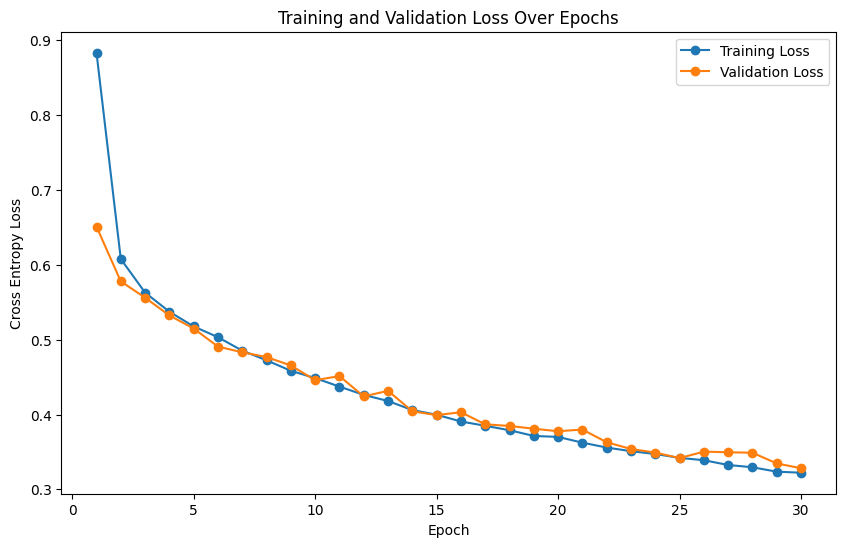

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", marker="o")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", marker="o")

plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.show()

In [13]:
Epoch [1/10] | Train Loss: 0.9057 | Val Loss: 0.6858
Epoch [2/10] | Train Loss: 0.6344 | Val Loss: 0.6051
Epoch [3/10] | Train Loss: 0.5800 | Val Loss: 0.5704
Epoch [4/10] | Train Loss: 0.5475 | Val Loss: 0.5430
Epoch [5/10] | Train Loss: 0.5254 | Val Loss: 0.5168
Epoch [6/10] | Train Loss: 0.5080 | Val Loss: 0.5075
Epoch [7/10] | Train Loss: 0.4932 | Val Loss: 0.4994
Epoch [8/10] | Train Loss: 0.4799 | Val Loss: 0.4795
Epoch [9/10] | Train Loss: 0.4698 | Val Loss: 0.4659
Epoch [10/10] | Train Loss: 0.4583 | Val Loss: 0.4634

self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 7) # 7 classes


